<h1 align="center">Tilastollinen Päättely 2, Demo 5</h1>

<br>

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

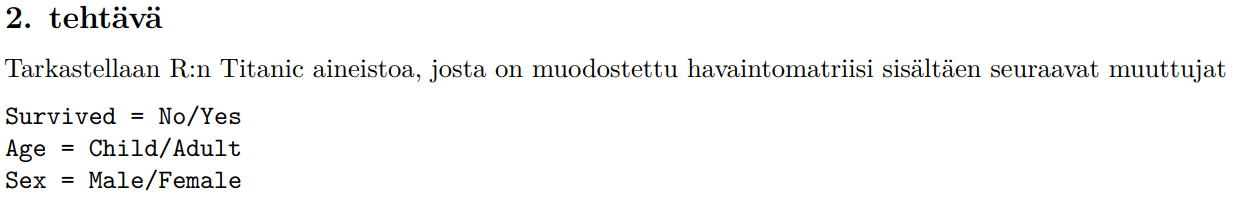

Muodosta ristiintaulukko ja tutki, onko selviytymisen ja iän välillä riippuvuutta käyttäen uskottavuusosamäärän testiä sekä sen approksimaatiota (peruskurssilla käytetty testi).

In [359]:
data = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/titanic.csv")

In [360]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [361]:
titanic = data[["Survived", "Age", "Sex"]].copy()

- Copy() -metodia käytetään varsinkin isojen datojen yhteydessä, jotta vältytään mahdollisilta ongelmilta, kun dataa muokataan (esim. SettingWithCopyWarning on aika yleinen, joka saattaa ilmaantua, jos alkuperäistä dataa muokataan ilman, että siitä on otettu kopiota).

In [362]:
titanic.head()

,Survived,Age,Sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male


- Survival (0 = No; 1 = Yes)
- Age (Adult >= 18.0)

In [363]:
titanic.dtypes

Survived      int64
Age         float64
Sex          object
dtype: object

In [364]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [365]:
# Muokataan Survived-saraketta helpommin luettavaksi ristiintaulukointia varten.
titanic["Survived"] = titanic["Survived"].replace({0: "No", 1: "Yes"})

In [366]:
titanic["Survived"].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [367]:
# Muokataan Age-muuttujasta binäärinen (Child / Adult)
titanic["Age"] = np.where(titanic["Age"] >= 18, "Adult", "Child")

In [368]:
titanic["Age"].value_counts()

Adult    601
Child    290
Name: Age, dtype: int64

In [369]:
# Ristiintaulukointi
contingency_table = pd.crosstab(titanic["Survived"], 
                                titanic["Age"], 
                                margins=True,
                                margins_name="Total")

In [370]:
contingency_table

Age,Adult,Child,Total
Survived,,,
No,372,177,549
Yes,229,113,342
Total,601,290,891


In [371]:
# Aikuiset
titanic[titanic["Age"] == "Adult"]["Survived"].value_counts()

No     372
Yes    229
Name: Survived, dtype: int64

In [372]:
# Lapset
titanic[titanic["Age"] == "Child"]["Survived"].value_counts()

No     177
Yes    113
Name: Survived, dtype: int64

- Kuten nähdään, numerot matchaavat Pandasin valmiin ristiintaulukkofunktion kanssa.

Uskottavuusosamäärän testisuure on

$$ D = 2 \, \sum_{i} \sum_{j} X_{ij} \, log \left(\frac{X_{ij}}{\tilde{m}_{ij}} \right) \quad \sim \chi^2(1). $$

Uskottavuusosamäärän approksimaation testisuure on

$$ D_{approx} = \sum_{i} \sum_{j} \frac{(X_{ij} - \tilde{m}_{ij})^2}{\tilde{m}_{ij}} \quad \sim \chi^2(1), $$

missä $\, X_{ij} \,$ ovat havaitut frekvenssit ja $\, \tilde{m}_{ij} \,$ ovat odotetut frekvenssit.

- Yksi tapa selvittää ristitaulukon muuttujien välistä riippuvuutta on laskea odotetuista frekvensseistä (expected frequencies) koostuva riippumattomuustaulu. 


- Solun (i, j) odotettu frekvenssi $\, e_{ij} \,$ on solun frekvenssin odotusarvo $\, \text{E}(f_{ij}) \,$ siinä tilanteessa, että rivi- ja sarakemuuttujat ovat keskenään riippumattomia ja taulukon reunajakaumat ovat kuten aineistossa.


- Jos jonkin (tai useamman) solun (i, j) havaittu frekvenssi $\, \boldsymbol{f_{ij}} \,$ ja odotettu frekvenssi $\, \boldsymbol{e_{ij}} \,$ poikkeavat selvästi toisistaan, vihjaa tämä muuttujien välisestä riippuvuudesta.

Solun (i, j) odotettu frekvenssi on

$$ e_{ij} = \frac{f_{i.} \, f_{.j}}{n}, $$

ts. se on solua vastaavien reunasummien tulo jaettuna havaintojen kokonaismäärällä.

In [373]:
contingency_table

Age,Adult,Child,Total
Survived,,,
No,372,177,549
Yes,229,113,342
Total,601,290,891


In [374]:
# Odotetut frekvenssit
eij = np.round(np.array([601*549, 290*549, 601*342, 290*342]) / 891, 2)

In [375]:
eij

array([370.31, 178.69, 230.69, 111.31])

In [376]:
riippumattomuustaulu = pd.DataFrame({"Adult": [eij[0], eij[2], eij[0]+eij[2]],
                                     "Child": [eij[1], eij[3], eij[1]+eij[3]],
                                     "Total": [eij[0]+eij[1], eij[2]+eij[3], sum(eij)]},
                                     index=["No", "Yes", "Total"])

riippumattomuustaulu = riippumattomuustaulu.rename_axis("Survived")

In [377]:
riippumattomuustaulu

,Adult,Child,Total
Survived,,,
No,370.31,178.69,549.0
Yes,230.69,111.31,342.0
Total,601.00,290.00,891.0


In [378]:
contingency_table

Age,Adult,Child,Total
Survived,,,
No,372,177,549
Yes,229,113,342
Total,601,290,891


- Kuten nähdään, riippumattomuustaulukon ja kontingenssitaulukon solujen arvot ovat hyvin lähellä toisiaan, joka tukee muuttujien välistä riippumattomuutta.
- Tämän perusteella yksin ei kuitenkaan voida sanoa juuta eikä jaata, vaan tarvitaan tilastollisia testejä.

In [379]:
# Muodostetaan myös havaituista frekvensseistä numpy-array,
# jotta laskuja on helpompi käsitellä.
Xij = np.array([372, 177, 229, 113])

Nyt uskottavuusosamäärään perustuvan testin testisuure ja p-arvo ovat:

In [380]:
# Testisuure
D_obs = 2*sum(Xij*np.log(Xij/eij))

# p-arvo
pVal_Dobs = 1 - scipy.stats.chi2(df=1).cdf(D_obs)

print(f"Uskottavuusosamäärän testin testisuureen arvo: {D_obs}")
print(f"Edellä mainittua testiä vastaava p-arvo: {pVal_Dobs}")

Uskottavuusosamäärän testin testisuureen arvo: 0.06167631387702066
Edellä mainittua testiä vastaava p-arvo: 0.8038658101209788


- Kuten yleensäkin tilastollisessa testaamisessa, alhainen testisuureen arvo indikoi korkeaa p-arvoa.
- Tilastollisen testin P-arvo on todennäköisyys havaita $\, \boldsymbol{H_0} \,$:n mukaisesta testisuureen jakaumasta vähintään yhtä poikkeava arvo kuin mitä aineistosta on laskettu.
- (Testisuureen arvo voi vaihdella otoksesta toiseen, vaikka otokset haettaisiin samasta populaatiosta, joten testisuureen arvo itsessään on **satunnaismuuttuja**).

Lasketaan vielä uskottavuusosamäärän testin approksimaation havaittu testisuureen arvo ja sen p-arvo.

In [381]:
# Testisuure
D_approx = sum((Xij-eij)**2 / Xij)

# p-arvo
pVal_Dapprox = 1 - scipy.stats.chi2(df=1).cdf(D_approx)

print(f"Uskottavuusosamäärän testiä approksimoiva testisuureen arvo: {D_approx}")
print(f"Edellä mainittua testiä vastaava p-arvo: {pVal_Dapprox}")

Uskottavuusosamäärän testiä approksimoiva testisuureen arvo: 0.061561120004818025
Edellä mainittua testiä vastaava p-arvo: 0.8040453259845388


- Lähes samat luvut, koska iso aineisto ja soluissa paljon massaa.
- Aineisto tukee riippumattomuushypoteesia, koska p-arvo on todella suuri.

<br>

<br>

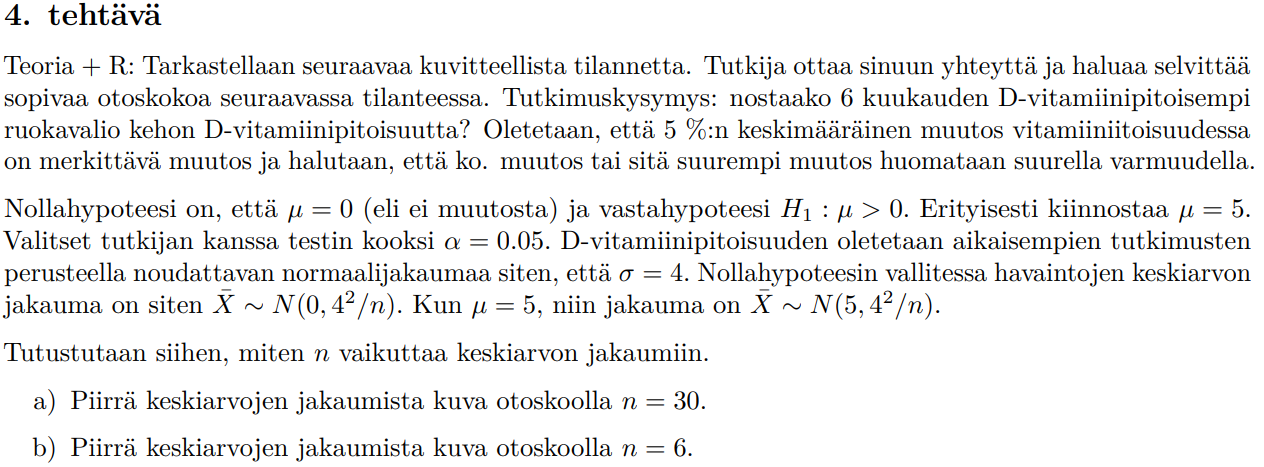

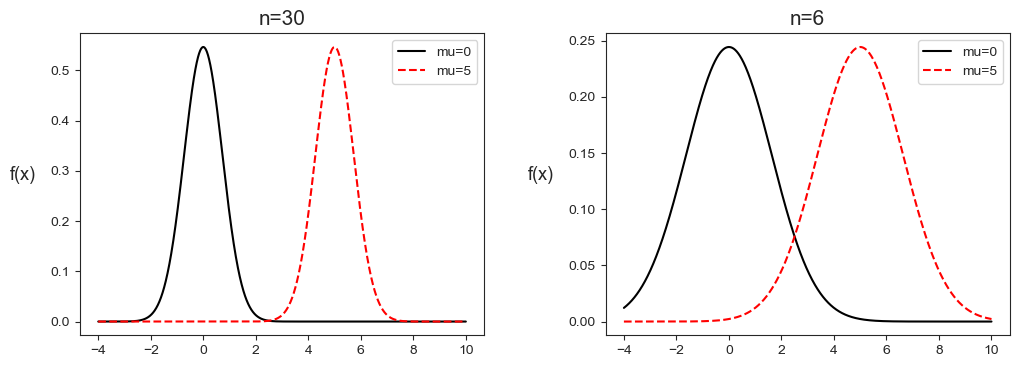

In [382]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=100)

# x-akselin arvot
x = np.arange(-4, 10.01, 0.01)

# n=30:

# Nollahypoteesin mukainen jakauma (mu=0)
sns.lineplot(x=x, 
             y=scipy.stats.norm.pdf(x, loc=0, scale=4/np.sqrt(30)), 
             ax=axs[0], 
             color="black",
             label="mu=0")

# Jakauma, kun mu=5
sns.lineplot(x=x, 
             y=scipy.stats.norm.pdf(x, loc=5, scale=4/np.sqrt(30)), 
             ax=axs[0], 
             linestyle="--",
             color="red",
             label="mu=5")

axs[0].set_title("n=30", size=15)
axs[0].set_ylabel("f(x)", rotation=0, labelpad=20, size=13)
axs[0].legend()

# n=6

# Nollahypoteesin mukainen jakauma (mu=0)
sns.lineplot(x=x,
             y=scipy.stats.norm.pdf(x, loc=0, scale=4/np.sqrt(6)),
             ax=axs[1],
             color="black",
             label="mu=0")

# Jakauma, kun mu=5
sns.lineplot(x=x,
             y=scipy.stats.norm.pdf(x, loc=5, scale=4/np.sqrt(6)),
             ax=axs[1],
             linestyle="--",
             color="red",
             label="mu=5")

axs[1].set_title("n=6", size=15)
axs[1].set_ylabel("f(x)", rotation=0, labelpad=20, size=13)
axs[1].legend()

# Siirretään graafeja kauemmaksi toisistaan horisontaalisuunnassa
plt.subplots_adjust(wspace=0.3);

- Huomataan, että mitä suurempi otoskoko on, sitä enemmän arvot sijoittuvat keskiarvonsa ympärille (jakauman huippu on korkeampi)
- Toisaalta, kun otoskoko on pienempi, niin jakauman huippu on matalampi ja arvot leviävät suuremmissä määrin kauemmas keskiarvonsa ympäriltä.

Tätä voidaan demonstroida vielä piirtämällä kuva, jossa otoskoko on vaikkapa 1000.

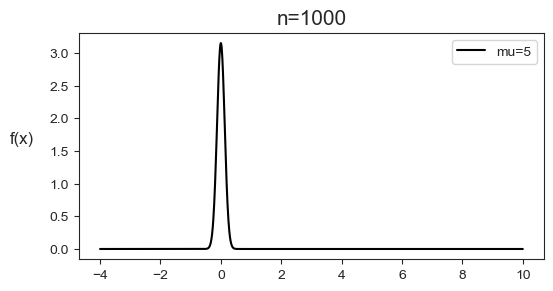

In [383]:
plt.figure(figsize=(6, 3), dpi=100)

sns.lineplot(x=x, 
             y=scipy.stats.norm.pdf(x, loc=0, scale=4/np.sqrt(1000)),  
             color="black",
             label="mu=5")

plt.title("n=1000", size=15)
plt.ylabel("f(x)", rotation=0, labelpad=20, size=12);

- Kuten nähdään, huippu on jälleen korkeampi ja jakauma näin ollen kapeampi.

<br>

<br>

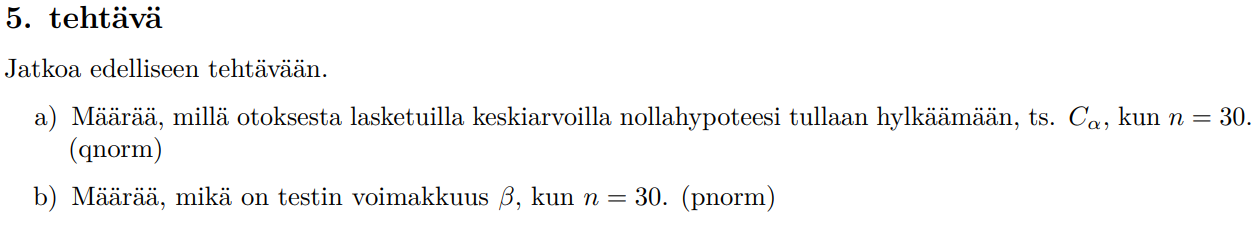

Tilastollinen testi määritellään hylkäysalueen $\, \boldsymbol{C_{\alpha}} \,$ avulla, joka on ototsavaruuden osajoukko.

$\quad \quad \boldsymbol{\rightarrow}$ Jos otos $\, (X_1,...,X_n) \in C_{\alpha}, \,$ niin $\, \boldsymbol{H_0} \,$ hylätään.

Testin koko on:
$$ P((X_1,...,X_n) \in C_{\alpha} | H_0)) = \alpha = 0.05. $$

Huomaa, että testin koko ja p-arvo ovat kaksi eria asiaa; testin koko on *suurin* p-arvo, jolla $\, \boldsymbol{H_0} \,$ hylätään.

Nyt nolla- ja vastahypoteesi ovat

\begin{align*}
    \boldsymbol{H_0} &: \mu = 0 \\
    \boldsymbol{H_1} &: \mu > 0 \quad (\mu = 5).
\end{align*}

Testin voimakkuus yksisuuntaiselle $\, H_1 \,$ on:

\begin{equation*}
    K_{\alpha} = P((X_1,...,X_n) \in C_{\alpha} \, | \, H_1).
\end{equation*}

Nollahypoteesin vallitessa $\, \mu = 0, \,$ joten keskiarvon jakauma on annettujen tietojen perusteella

\begin{equation*}
    \bar{X} \sim N \left(0, \, \frac{4^2}{30} \right).
\end{equation*}

\begin{equation*}
\begin{aligned}
    \boldsymbol{P}(\bar{X} \ge c \, | \, \mu = 0) &= 0.05 \\
    \rightarrow \boldsymbol{P}(\bar{X} \le c \, | \, \mu = 0) &= 1 - \boldsymbol{P}(\bar{X} \ge c \, | \, \mu = 0) \\
    &= 1 - 0.05 \\
    &= 0.95
\end{aligned}
\end{equation*}

In [384]:
C_alpha = scipy.stats.norm.ppf(q=0.95, loc=0, scale=4/np.sqrt(30))
C_alpha

1.2012312470340116

- Keskiarvot, jotka ovat *vähintään* 1.201, ovat hylkäysalueella:

\begin{equation*}
    C_{\alpha} = \{\bar{x} : \bar{x} \ge 1.201\}.
\end{equation*}

<br>

Vastahypoteesin ollessa voimassa ($\mu = 5$) keskiarvon jakauma on annettujen tietojen perusteella

\begin{equation*}
    \bar{X} \sim N \left(5, \, \frac{4^2}{30} \right).
\end{equation*}

Testin voimakkuus $\, \beta, \,$ kun n=30, on

\begin{equation*}
\begin{aligned}
    \beta &= \boldsymbol{P}(\bar{X} \ge 1.201 \, | \, \mu = 5) \\
    &= 1 - \boldsymbol{P}(\bar{X} \le 1.201 \, | \, \mu = 5) 
\end{aligned}
\end{equation*}

In [385]:
testin_voimakkuus = 1 - scipy.stats.norm.cdf(C_alpha, loc=5, scale=4/np.sqrt(30))
testin_voimakkuus

0.9999999012515866

- Tavoitteena on löytää sellainen hylkäysalue, jolle $\, \beta \,$ eli testin voimakkuus on suurin (lähinnä arvoa 1). 
- Voitaisiin sanoa, että tässä onnistuttiin hyvin, sillä testin voimakkuus on todella lähellä arvoa 1.

<br>

<br>

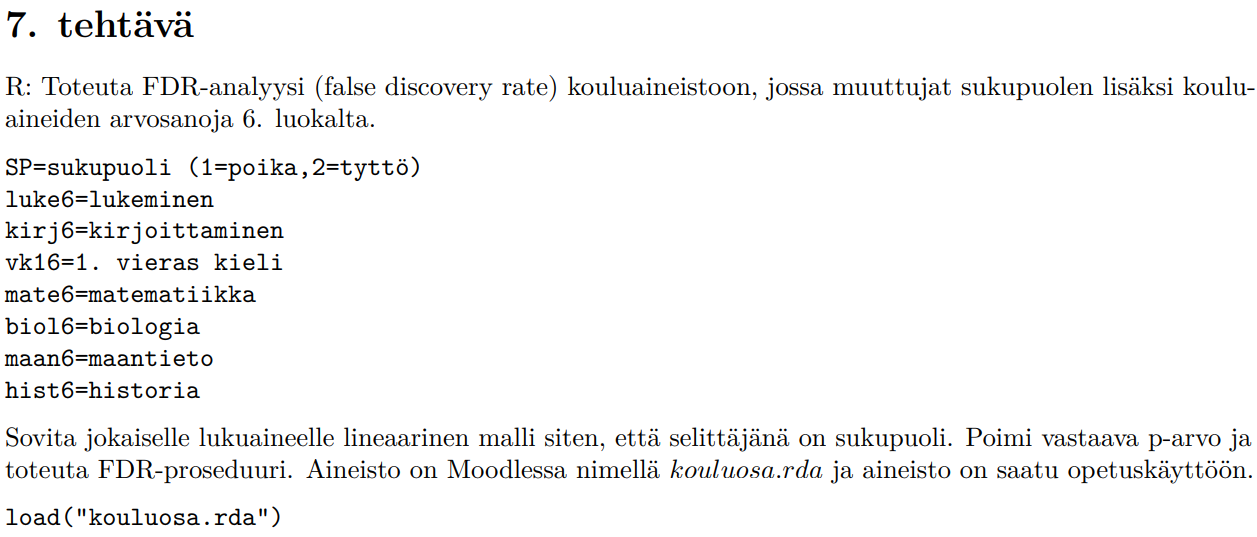

**Monitestauskorjausta käytetään, kun samasta aineistosta testataan useita eri hypoteeseja.** Kuvitellaan, että testattavana on vaikkapa miljoona eri hypoteesia (hyvin normaalia geenitutkimuksissa) ja monitestauskorjausta ei tehdä. Asetetaan kiinnostavan tuloksen rajaksi p-arvo 0.05. Nyt havaitaan keskimäärin ainakin 1000000*0.05 = 50000 kiinnostavaa tulosta. Näiden kiinnostavien tulosten joukossa tulee suurella todennäköisyydellä olemaan useita tuloksia, jotka luokitellaan kiinnostavaksi, vaikka kyseessä on ainoastaan satunnaisuudesta johtuva ilmiö (ts. nollahypoteesit hylätään, vaikka nyllahypoteesit olisivat totta).

Virheellisten löydösten osuus (false discovery rate, FDR) on vaihtoehtoinen lähestymistapa monistestaukseen (usein käytetään myös nk. Bonferroni-korjausta). Lähtökohtana FDR:ssä on alla olevan taulukon mukainen nelikenttä, jossa on testattu m toisistaan riippumatonta hypoteesia.

<div> 
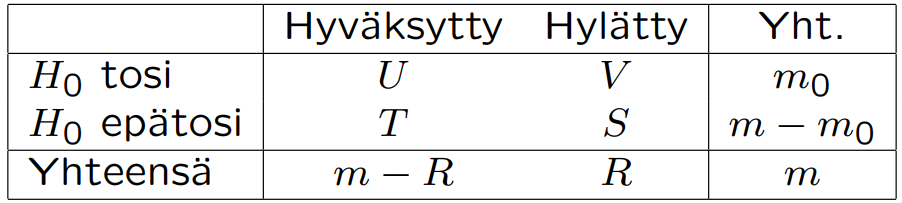
</div>

FDR-proseduurissa valitaan ensin haluttu virheellisten löydösten osuus $\, q^*, \,$ jonka jälkeen etsitään järjestettyjen p-arvojen $\, p_{(1)} \le p_{(2)} \le \, ... \, p_{(m)} \,$ joukosta indeksi **k**, joka on suurin indeksi, jolle pätee

$$ p_k \le \frac{k}{m} \, q^* $$

ja hylätään k pienintä p-arvoa vastaavat nollahypoteesit.

Nämä ovat jatkotutkimusten kannalta kiinnostavia tuloksia, joista osa on virheellisiä löydöksiä siten, että virheellisten löydösten osuuden odotusarvo on $\, q^*. \,$ Jos esimerkiksi on valittu $\, q^* = 0.2, \,$ voidaan odottaa, että noin 20 % löydöksistä on virheellisiä.

In [386]:
koulu = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/kouluaineisto.csv", index_col=0)

In [387]:
koulu.head()

,SP,luke6,kirj6,vk16,mate6,biol6,maan6,hist6
2,2,9,8,9,8,9,9,8
3,2,6,6,5,6,6,5,5
4,2,9,9,8,8,9,8,9
5,2,9,9,9,9,9,8,9
6,2,8,7,8,8,7,7,8


In [388]:
koulu.dtypes

SP       int64
luke6    int64
kirj6    int64
vk16     int64
mate6    int64
biol6    int64
maan6    int64
hist6    int64
dtype: object

In [389]:
koulu.shape

(535, 8)

In [390]:
koulu["SP"].value_counts()

2    283
1    252
Name: SP, dtype: int64

In [391]:
pojat = koulu[koulu["SP"] == 1]
tytot = koulu[koulu["SP"] == 2]

In [392]:
# Poikien lukuaineiden keskiarvot
pojat_ka = pojat.drop("SP", axis=1).mean()
pojat_ka

luke6    7.607143
kirj6    7.198413
vk16     6.980159
mate6    7.468254
biol6    7.539683
maan6    7.535714
hist6    7.424603
dtype: float64

In [393]:
# Tyttöjen lukuaineiden keskiarvot
tytot_ka = tytot.drop("SP", axis=1).mean()
tytot_ka

luke6    8.130742
kirj6    8.077739
vk16     7.855124
mate6    7.558304
biol6    8.028269
maan6    7.784452
hist6    7.819788
dtype: float64

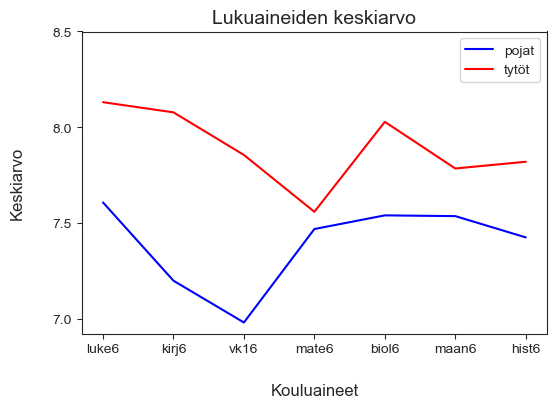

In [394]:
plt.figure(figsize=(6, 4), dpi=100)

plt.plot(pojat_ka, color="blue", label="pojat")
plt.plot(tytot_ka, color="red", label="tytöt")

plt.title("Lukuaineiden keskiarvo", size=14)
plt.xlabel("Kouluaineet", labelpad=20, size=12)
plt.ylabel("Keskiarvo", labelpad=20, size=12)
plt.legend()

plt.yticks([7.0, 7.5, 8.0, 8.5]);

<h3 align="left">Benjamini-Hochberg method (False Discovery Rate, FDR)</h3>

In [400]:
import statsmodels.api as sm

In [489]:
def calculate_p_vals(df, m: int, degrees_of_freedom: int):
    """
    Funktio laskee yksinkertaisten lineaaristen regressiomallien regressiokertoimien p-arvot.
    Yksinkertainen regressiomalli on muotoa y = b0 + b1x + e.
    
    Lukijalle tiedoksi, että statsmodels-kirjaston OLS-funktiot laskevat regressiokertoimien \
    p-arvot suoraan, kun fit() -metodi kutsutaan 
    <statsmodels.regression.linear_model.OLS at 0x1f34b6bb490> -objektiin.
    Nämä p-arvot saadaan pvalues -attribuutilla, joka löytyy edellä mainituilta objekteilta
    (kunhan siihen on kutsuttu fit() -metodi).
    
    Args:
        dataframe: Datakehikko, joka sisältää vastemuuttujan ja selittävät muuttujat,
                   joista lineaariset regressiomallit (regressiokertoimien p-arvot) lasketaan.
        m: P-arvojen lukumäärä.
        df: Vapausasteet (yksinkertaisen lineaarisen regression tapauksessa df=n-2)
        
    Returns:
        Funktio palauttaa listan p-arvoja, jotka vastaavat regressiokertoimia b1.
    """
    # Selittävä muuttuja (numpy-taulukkona)
    X = koulu["SP"].values
    # Lisätään selittäjälle X sarake, joka sisältää pelkkiä ykkösiä 
    # (ilman tätä regressiosuora pakotetaan kulkemaan origon kautta)
    X = sm.add_constant(X)
    
    # Vastemuuttujat (numpy-taulukkona)
    y = koulu.drop("SP", axis=1).values
    
    # Lista, johon tallennetaan regressiokertoimien b1 p-arvot.
    p_values = []
    
    # Silmukka nollasta kutoseen (sovitetaan yhteensä 7 lineaarista regressiomallia)
    for i in range(0, 7):
        
        # Poimitaan vuorotellen kukin lukuaineista vastemuuttujaksi
        vaste = y[:, i]
        
        # Sovitetaan lineaarinen regressiomalli
        model = sm.OLS(vaste, X).fit()
        
        # Sukupuoli-muuttujaa vastaava regressiokerroin b1
        betahat = model.params[1]
        
        # Regressiokertoimen b1 keskivirhe. 
        # Regressiokertoimen keskivirhe on sen varianssin neliöjuuri.
        # Regressiokertoimien varianssit sijaitsevat niiden kovarianssimatriisin diagonaalilla.
        # --> Regressiokertoimen b1 keskivirhe saadaan ottamalla neliöjuuri kovarianssimatriisin \
        # kohdasta [1, 1] (1. rivi, 1. sarake)
        # (keskivirheen saisi myös suoraan sovitetun regressiomallin bse -attribuutilla).
        SE_betahat = np.sqrt(model.cov_params()[1, 1])
        
        # t-testin testisuureen arvo saadaan kaavalla t = b / SE(b)
        t_observed = betahat / SE_betahat
        
        # Lasketaan p-arvo ja lisätään se p_values -listaan
        p_val = 2 * (1 - scipy.stats.t.cdf(abs(t_observed), df=degrees_of_freedom))
        p_values.append(p_val)
        
    # Palautetaan JÄRJESTETTY p-arvojen lista,
    # sillä p-arvot täytyy järjestää Benjamini-Hochberg -metodia varten.
    return sorted(p_values)

In [515]:
# Tulostetaan regressiokertoimien p-arvot viiden desimaalin tarkkuudella

p_vals = calculate_p_vals(koulu, 7, len(koulu)-2)

p_vals_rounded = [round(value, 5) for value in p_arvot]

for value in p_vals_rounded:
    print("{:.5f}".format(value))

0.00000
0.00000
0.00000
0.00000
0.00011
0.01132
0.42772


<br>

In [552]:
def false_discovery_rate(q: float, p_values: list):
    """
    Funktio laskee halutun ylärajan,
    jota pienemmät p-arvot hylätään (eli näitä p-arvoja vastaavat nollahypoteesit hylätään).
    
    Args:
        q: Virheellisten löydösten odotusarvo. Jos esimerkiksi q = 0.2, voidaan odottaa,
           että noin 20 % löydöksistä on virheellisiä.
        p_values: Lista regressiokertoimiin liittyviä p-arvoja.
        
    Returns:
        Funktio palauttaa listan niistä regressiokertoimiin liittyvistä p-arvoista,
        jotka ovat pienempiä kuin yläraja (ja joihin liittyvät nollahypoteesit täten hylätään).
    """
    p_values = np.array(p_values)
    m = len(p_values)
    ylarajat = []
    for k in range(1, m+1):
        ylarajat.append((k/m)*q)
        
    # Käytetään boolean-indeksointia, jotta saadaan palautettua ne p-arvot,
    # jotka ovat pienempiä kuin laskettu yläraja.
    return p_values[p_values < ylarajat]

In [553]:
tulos_fdr = false_discovery_rate(0.05, p_vals)

rounded_fdr = [round(value, 5) for value in tulos_fdr]

for val in rounded_fdr:
    print("{:.5f}".format(val))

0.00000
0.00000
0.00000
0.00000
0.00011
0.01132


In [551]:
# Tulostetaan uudestaan regressiokertoimien p-arvot viiden desimaalin tarkkuudella

p_vals = calculate_p_vals(koulu, 7, len(koulu)-2)
p_vals_rounded = [round(value, 5) for value in p_arvot]
for value in p_vals_rounded:
    print("{:.5f}".format(value))

0.00000
0.00000
0.00000
0.00000
0.00011
0.01132
0.42772


- Nähdään, että kuudelle pienimmälle p-arvolle pätee 

$$p_{(k)} \le \frac{k}{m} \, q^*.$$

$\, \quad \boldsymbol{\rightarrow} \,$ näihin p-arvoihin liittyvät nollahypoteesit hylätään.

Nollahypoteesien mukaan arvosanoissa ei ole eroa sukupuolten välillä. Koska kuuden lukuaineen kohdalla nollahypoteesi hylättiin, voidaan siis todeta, että kuuden lukuaineen arvosanoissa on tilastollisesti merkitsevä ero tyttöjen ja poikien välillä. 0.42772 on matematiikan arvosanan regressiokertoimeen liittyvä p-arvo (johon liittyvä nollahypoteesi on siis ainoa, jota ei hylätty). Täten siis voidaan todeta, että suoritetun analyysin mukaan matematiikka on ainoa lukuaine, jossa tyttöjen ja poikien välillä ei ole tilastollisesti merkitsevää eroa.

In [560]:
# Tässä vielä matematiikan arvosanaan liittyvä regressiokertoimen p-arvo,
# joka todella on 0.42772.
np.round(ols("mate6 ~ SP", data=koulu).fit().pvalues["SP"], 5)

0.42772